In [68]:
import os
import tensorflow as tf
from tensorflow.core.util import event_pb2
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

figsize=(15, 10)
export_dir = './plots_PP/'
data_dir = '/home/yuxin/meltingpot/MARL/logs/PP_test.npz'
env_name = 'Pure Coordination Small 3 Seeds'
seeds = 3
total_timestep = 1.25e6

sns.set()
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor":".93"})

In [69]:
def read_evaluation_data(data_dir):
    raw_data = np.load(data_dir)
    timesteps = raw_data['timesteps']
    policy_reward_min = raw_data['policy_reward_min']
    policy_reward_mean = raw_data['policy_reward_mean']
    policy_reward_max = raw_data['policy_reward_max_0']
    num_seeds = timesteps.shape[0]
    num_agents = policy_reward_mean.shape[1]

    df = pd.DataFrame({'timesteps': timesteps.flatten(), 'seeds': np.repeat(np.arange(num_seeds), timesteps.shape[1])})
    df_list = [df, df]
    cleaned_df = []
    for i in range(num_agents):
        df_list[i]['policy_reward_min'] = policy_reward_min[:,i,:].flatten()
        df_list[i]['policy_reward_mean'] = policy_reward_mean[:,i,:].flatten()
        df_list[i]['policy_reward_max'] = policy_reward_max[:,i,:].flatten()
        cleaned_df.append(df_list[i].dropna())
    
    return cleaned_df

In [70]:
data_plot = read_evaluation_data(data_dir)
data_plot[0]

,timesteps,seeds,policy_reward_min,policy_reward_mean,policy_reward_max
2,4800,0,8.261621,8.261621,8.261621
3,6400,0,8.261621,8.261621,8.261621
4,8000,0,8.261621,11.395215,14.528810
5,9600,0,8.261621,11.395215,14.528810
6,11200,0,6.972698,9.921043,14.528810
...,...,...,...,...,...
2245,1193600,2,10.655556,24.174789,55.111111
2246,1195200,2,10.655556,24.132932,55.111111
2247,1196800,2,10.655556,24.132932,55.111111
2248,1198400,2,10.655556,24.229710,55.111111


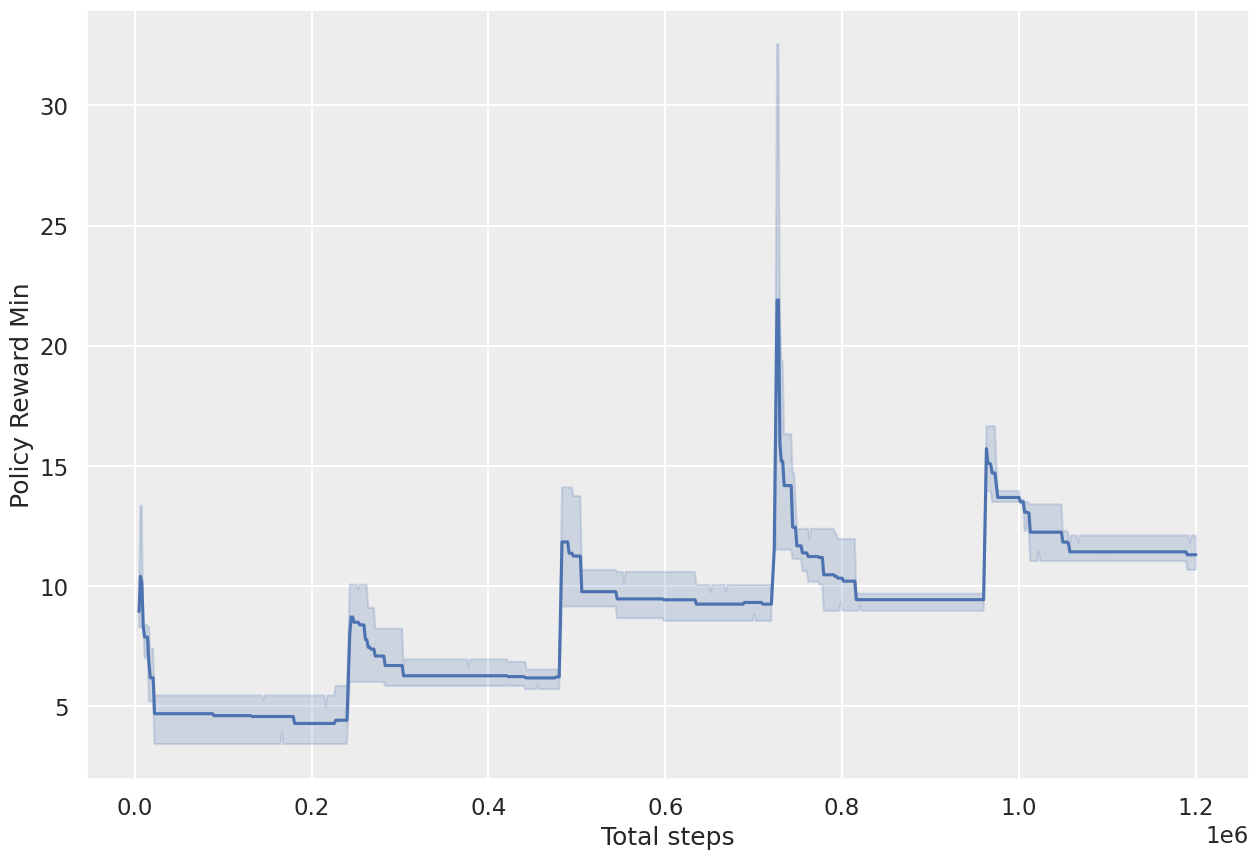

In [71]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(data=data_plot[0], x='timesteps', y='policy_reward_min')
ax.set(xlabel='Total steps', ylabel='Policy Reward Min')
# plt.xticks(np.arange(0, total_timestep, 2e5))
# xlabels = ['{:.1f}'.format(x) + 'M' for x in g.get_xticks()/1e6]
# g.set_xticklabels(xlabels)
plt.savefig(os.path.join(export_dir, env_name+' reward min.pdf'), bbox_inches='tight')

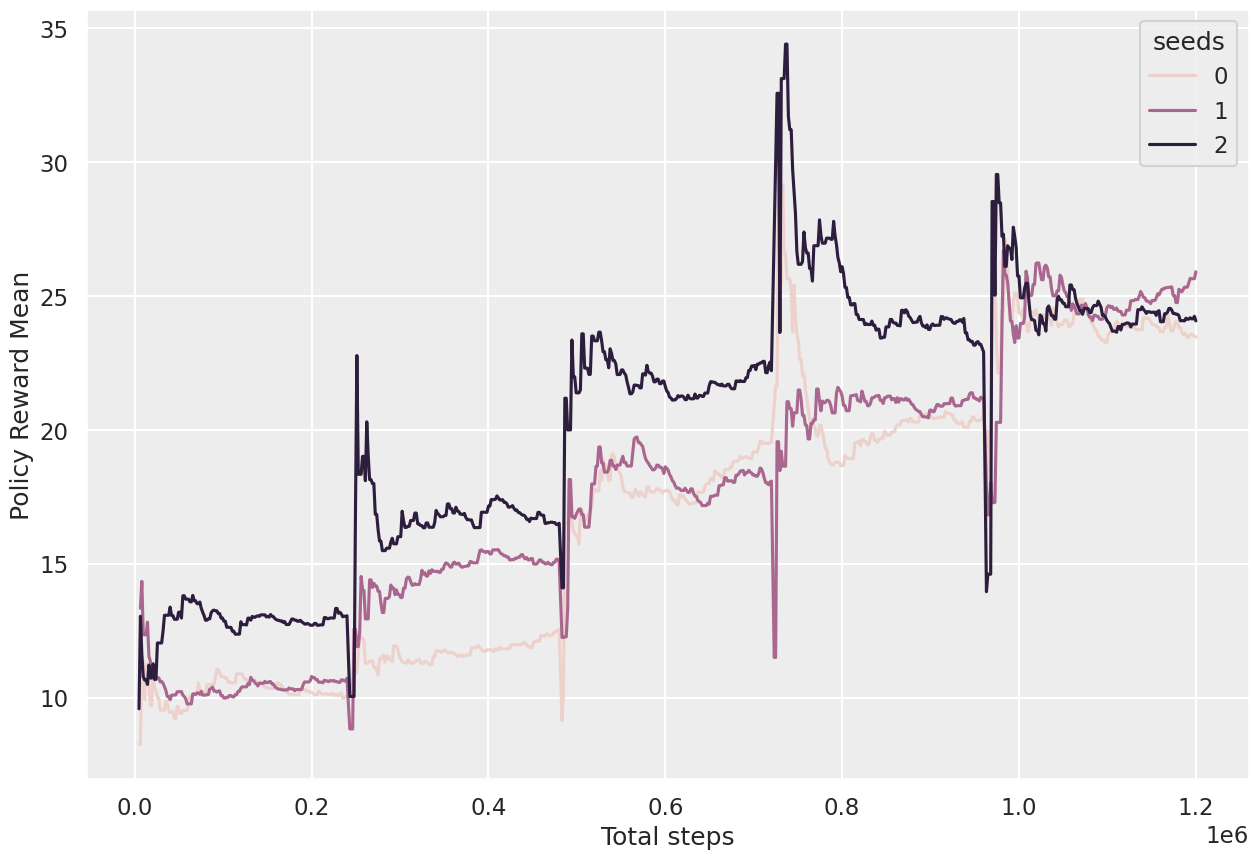

In [76]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(data=data_plot[0], x='timesteps', y='policy_reward_mean')
ax.set(xlabel='Total steps', ylabel='Policy Reward Mean')
# plt.xticks(np.arange(0, total_timestep, 2e5))
# xlabels = ['{:.1f}'.format(x) + 'M' for x in g.get_xticks()/1e6]
# g.set_xticklabels(xlabels)
plt.savefig(os.path.join(export_dir, env_name+' reward mean.pdf'), bbox_inches='tight')

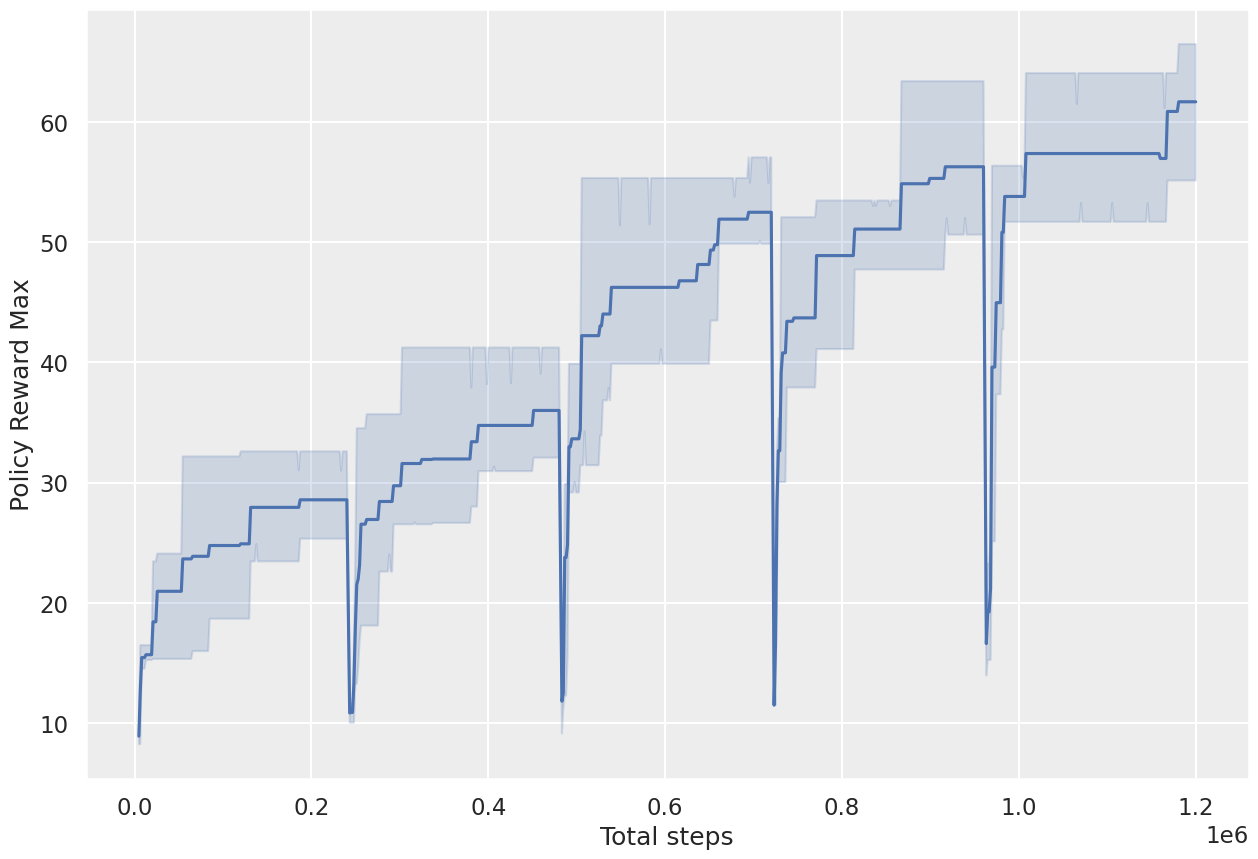

In [73]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(data=data_plot[0], x='timesteps', y='policy_reward_max')
ax.set(xlabel='Total steps', ylabel='Policy Reward Max')
# plt.xticks(np.arange(0, total_timestep, 2e5))
# xlabels = ['{:.1f}'.format(x) + 'M' for x in g.get_xticks()/1e6]
# g.set_xticklabels(xlabels)
plt.savefig(os.path.join(export_dir, env_name+' reward max.pdf'), bbox_inches='tight')